https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset

In [25]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [26]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [27]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [28]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

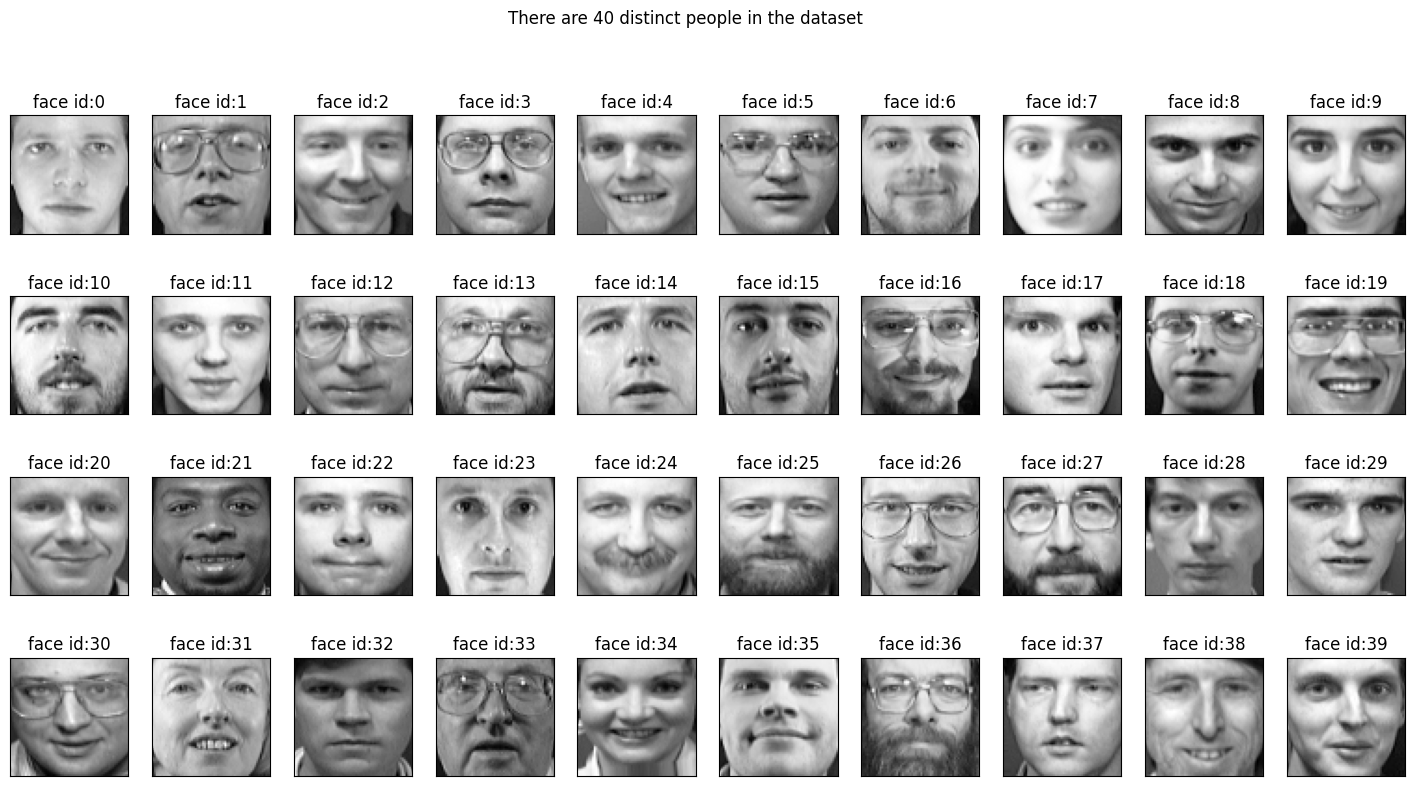

In [29]:
show_40_distinct_people(data, np.unique(target))

In [30]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

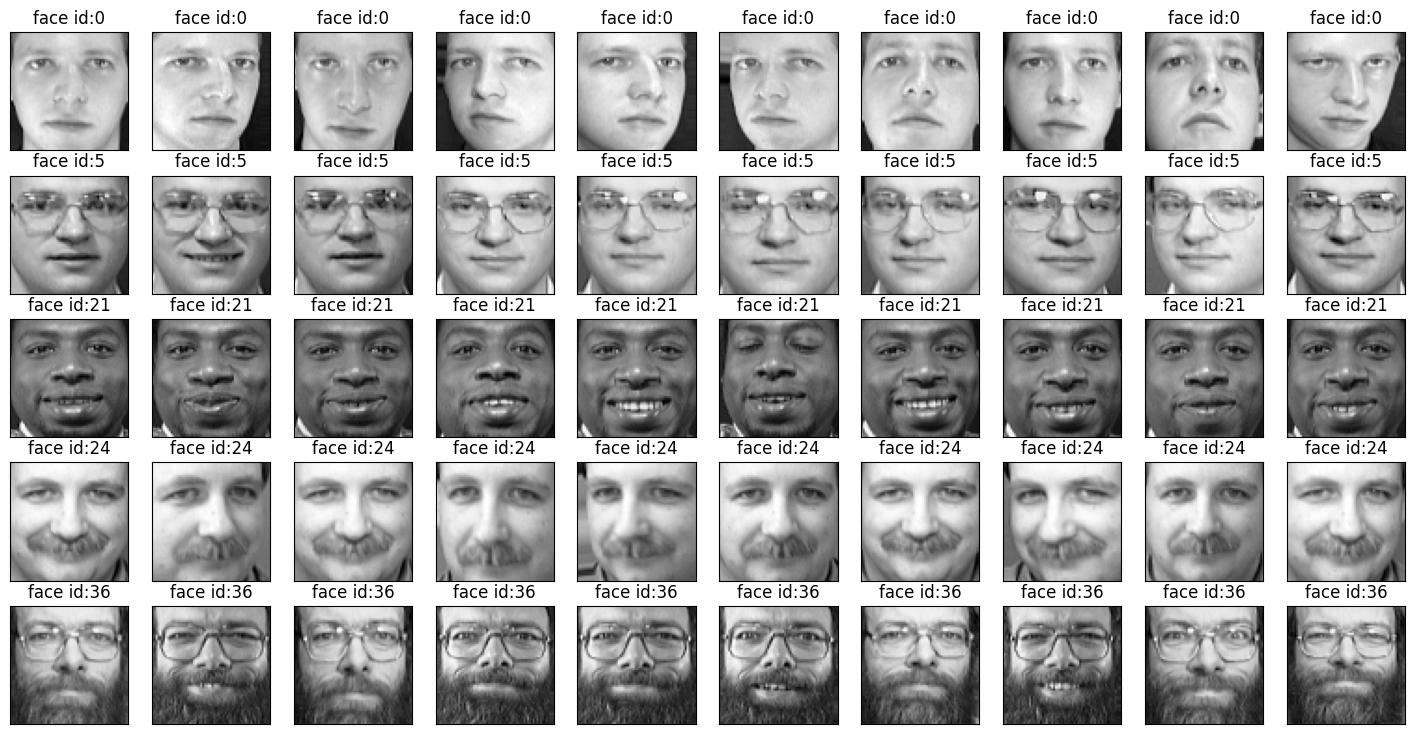

In [31]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [32]:
data.shape

(400, 64, 64)

In [33]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


   subject ids
0           31
1           26
2            9
3           31
4           26


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

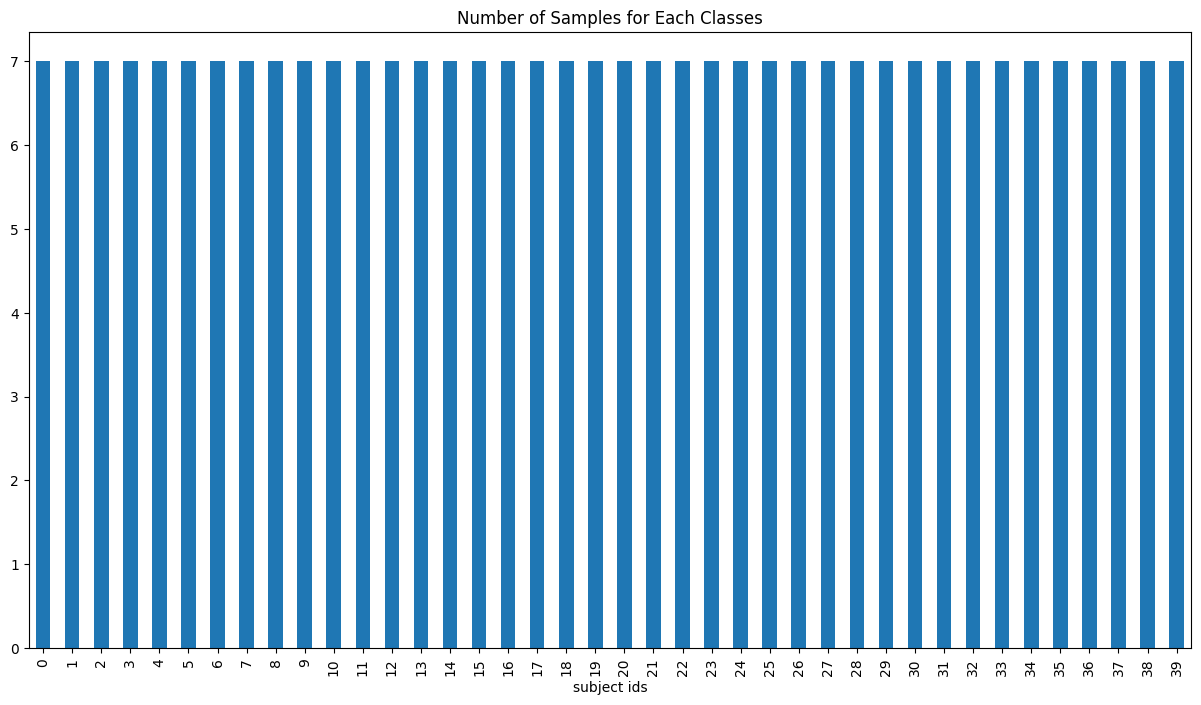

In [35]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
print(y_frame.head())
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

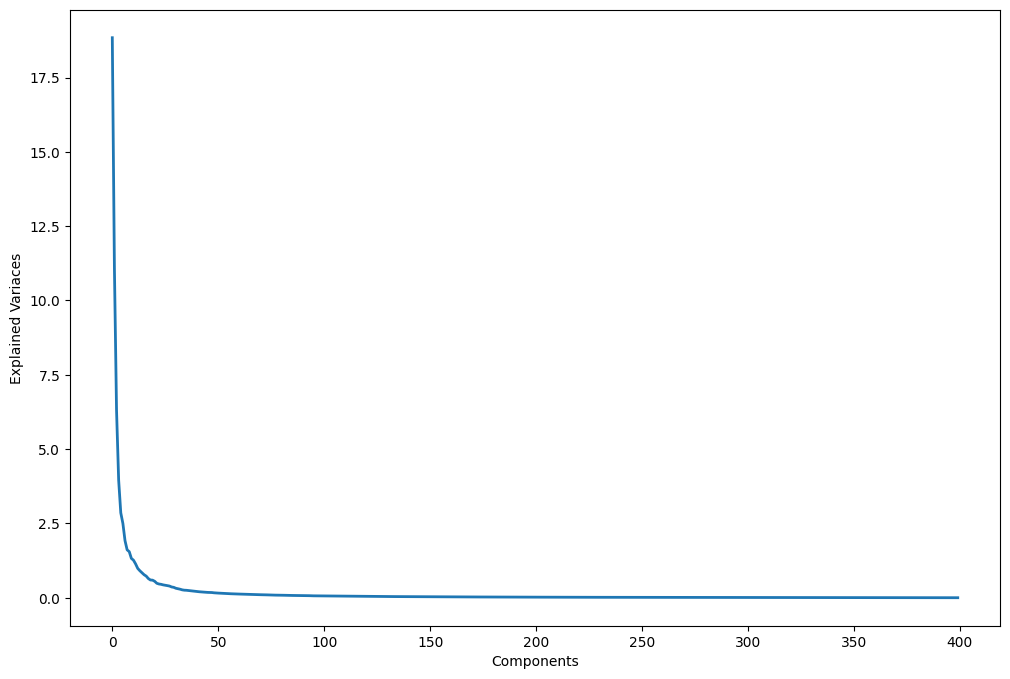

In [36]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [37]:
n_components=90

In [38]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

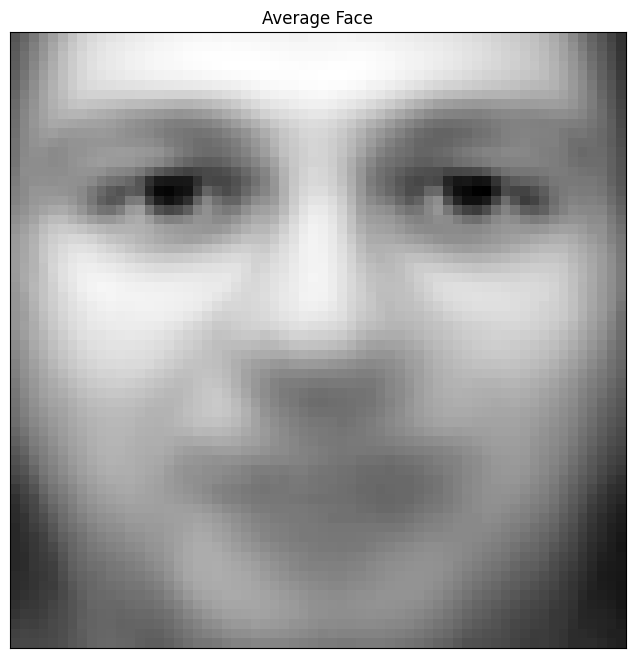

In [39]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

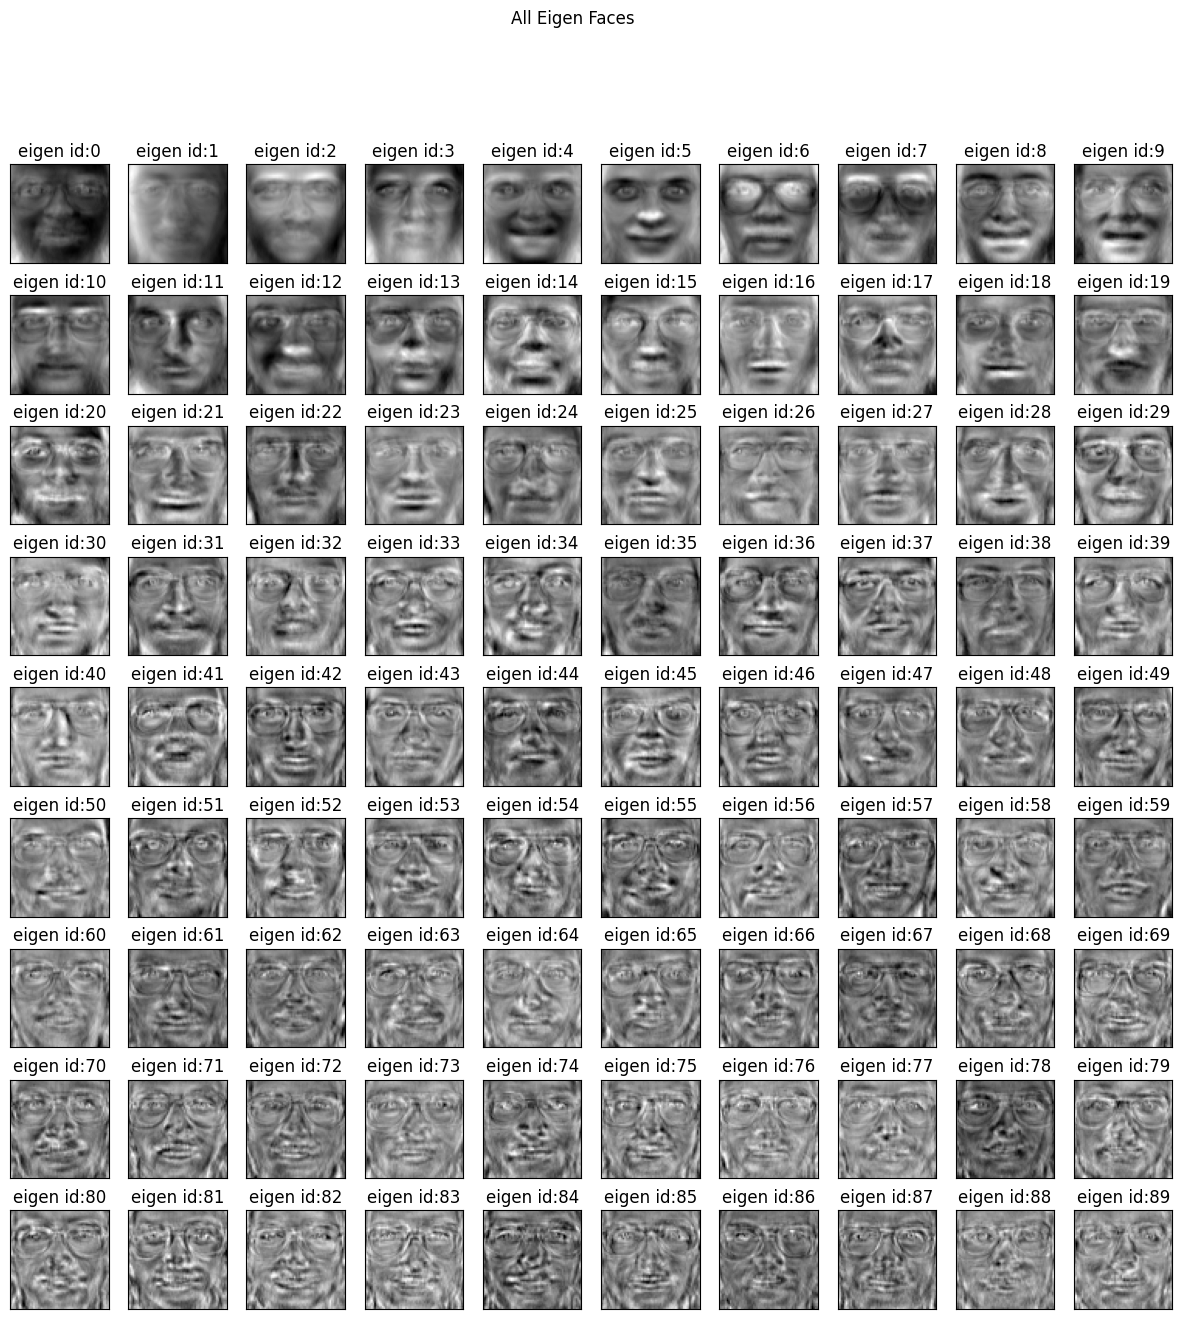

In [40]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [41]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [42]:
# score with pca dimension reduction
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score with pca:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score with pca:0.92


In [43]:
#score without pca dimension reduction
clf_no_pca = SVC()
clf_no_pca.fit(X_train, y_train)
y_pred_no_pca = clf_no_pca.predict(X_test)
print("accuracy score without pca:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_no_pca)))

accuracy score without pca:0.88


In [44]:
print(f"Data complexity without pca: {X_train.shape}")
print(f"Data complexity with pca: {X_train_pca.shape}")


Data complexity without pca: (280, 4096)
Data complexity with pca: (280, 90)


In [45]:
sample_prediction = clf.predict(X_test_pca[0].reshape(1, -1))
print(f"Support Vector Classifier predicts the first face to belong to person {sample_prediction}.")

Support Vector Classifier predicts the first face to belong to person [39].


<Axes: >

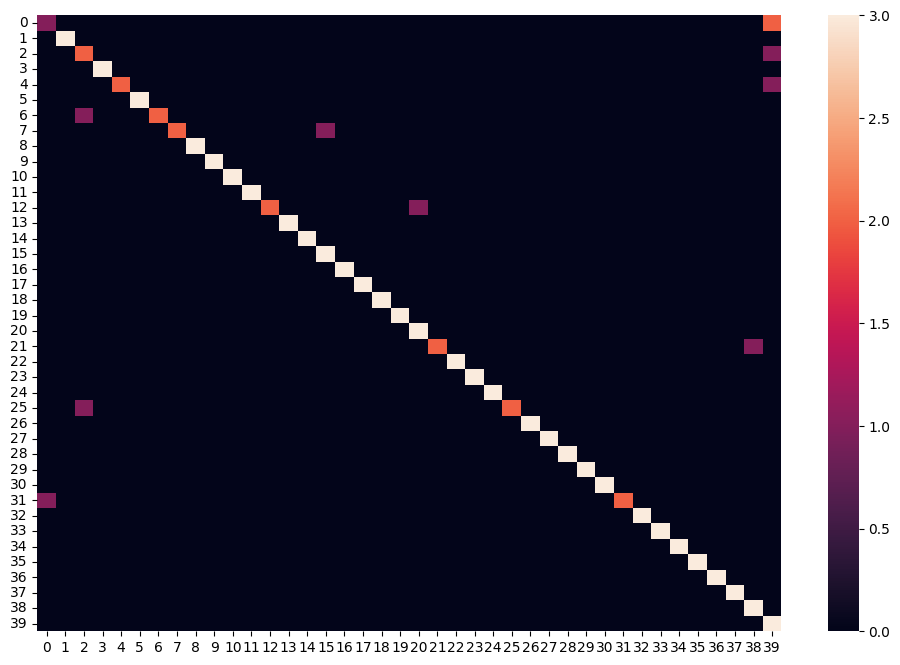

In [108]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [129]:
# other classifier models

models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression(max_iter=999999)))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model
    clf_no_pca = model
    clf.fit(X_train_pca, y_train)
    y_pred=clf.predict(X_test_pca)
   
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score with pca:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    clf_no_pca.fit(X_train, y_train)
   
    y_pred_no_pca = clf_no_pca.predict(X_test)
    print("Accuracy score without pca:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred_no_pca)))

    print()

========== LDA RESULT ==========
Accuracy score with pca:0.93
Accuracy score without pca:0.94

========== LR RESULT ==========
Accuracy score with pca:0.93
Accuracy score without pca:0.92

========== NB RESULT ==========
Accuracy score with pca:0.87
Accuracy score without pca:0.82

========== KNN RESULT ==========
Accuracy score with pca:0.69
Accuracy score without pca:0.79

========== DT RESULT ==========
Accuracy score with pca:0.65
Accuracy score without pca:0.58

========== SVM RESULT ==========
Accuracy score with pca:0.92
Accuracy score without pca:0.88

